In [21]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('bmh')

In [87]:
# Analysis Set
df = pd.read_csv("analysis_set.csv")

#Cluster Means
cluster_means = pd.read_csv("cluster_averages.csv")
cluster_means = cluster_means.rename(columns={"Unnamed: 0": "Factor"})

#my_test
my_test = pd.read_csv("my_test_normalized.csv")
my_test = my_test.rename(columns={"Unnamed: 0": "Factor"})

# Functions

In [5]:
# Cluster is the last column and we don't need to visualise it in our functions
def plot_columns(df):
    for column in df.columns:
        sns.histplot(df[column], kde=True)
        plt.show()

def factor_plot(df):
    for column in df.columns:
        sns.displot(data=df, y= df.iloc[:,:-1][column], hue = 'Cluster', col='Cluster', kind="ecdf", height=4, aspect=.7)
        plt.show()
        
def box_plot_cl(df):
    for column in df.columns:
        sns.boxplot(data=df, x = 'Cluster', y = df.iloc[:,:-1][column])
        plt.show()

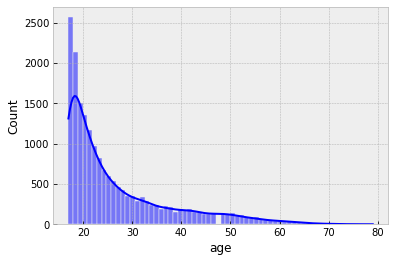

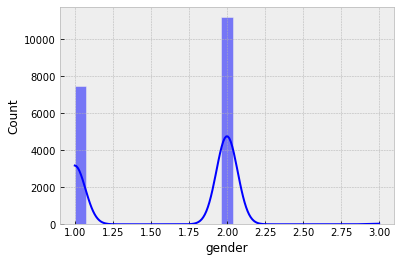

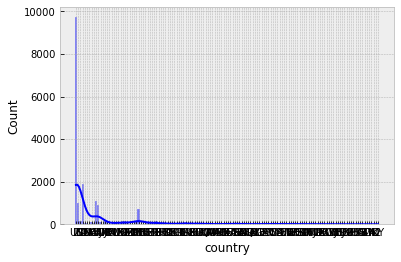

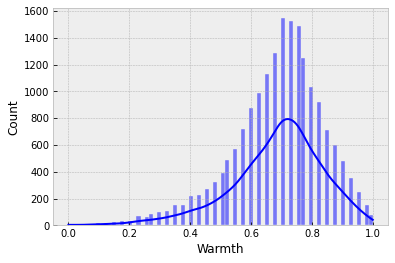

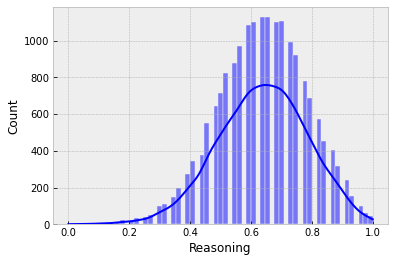

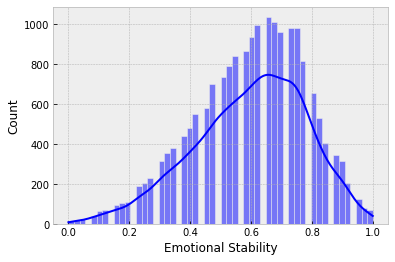

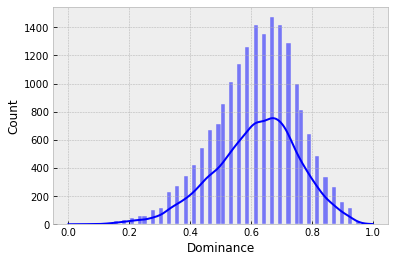

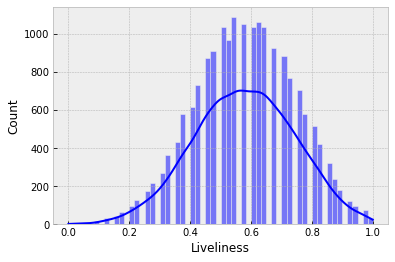

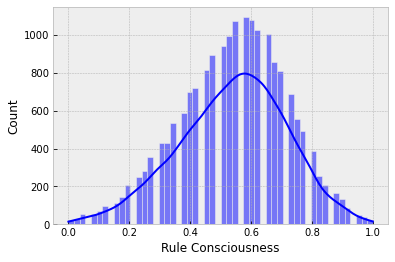

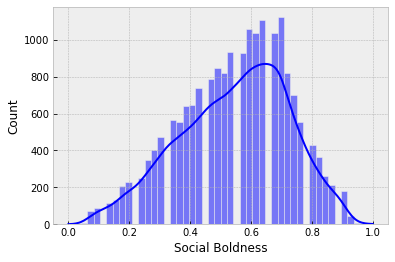

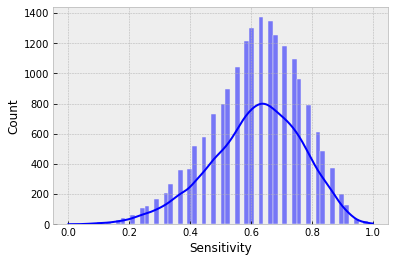

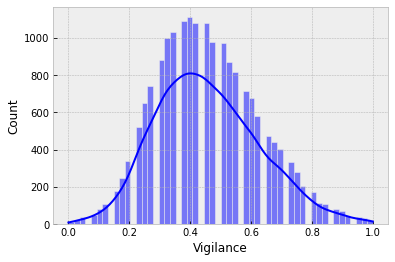

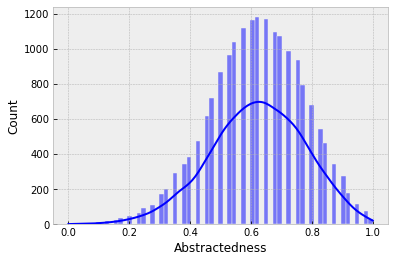

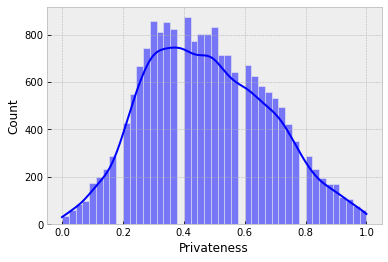

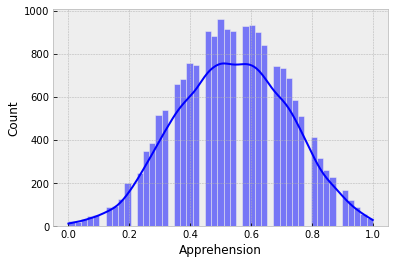

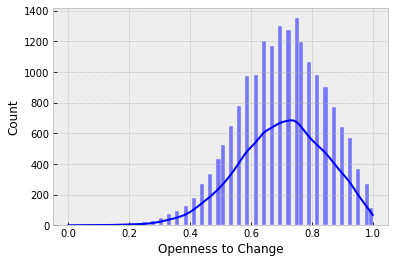

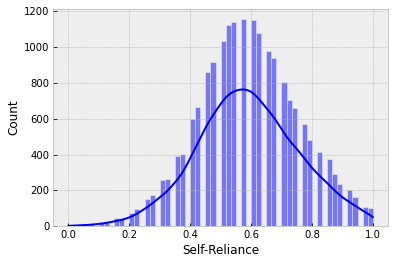

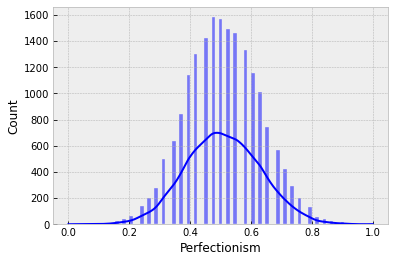

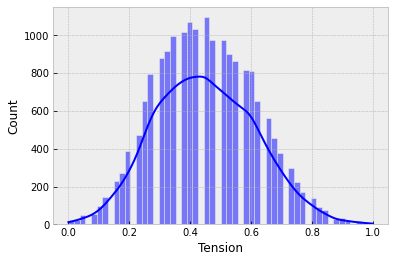

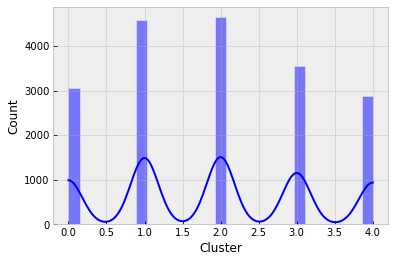

In [6]:
plot_columns(df)

2.0    11189
1.0     7459
3.0       72
Name: gender, dtype: int64

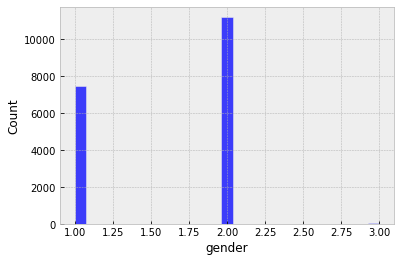

In [7]:
sns.histplot(df.gender)
df.gender.value_counts()

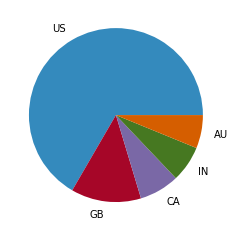

In [8]:
country = df.country.value_counts().loc[lambda x: x>750]
plt.pie(country, labels = country.index, labeldistance=1.15)
plt.show()

In [ ]:
from pandas_profiling import ProfileReport

#EDA using pandas-profiling
#profile = ProfileReport(pd.read_csv('analysis_set.csv'), explorative=True)

#Saving results to a HTML file
#profile.to_file("Profile.html")

In [11]:
my_cluster = 3

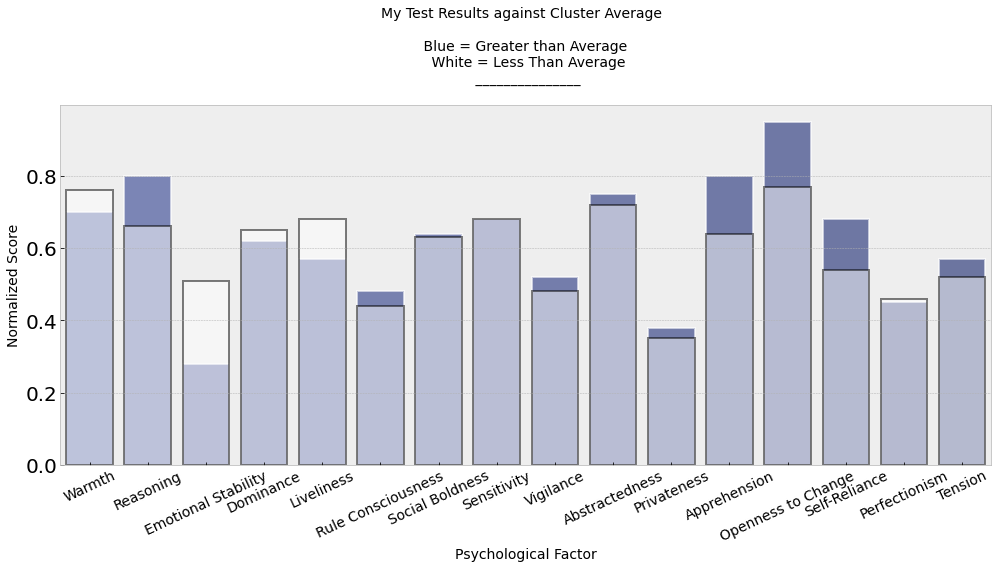

In [197]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=25, fontsize=14)
plt.yticks(fontsize=20)
sns.barplot(data=my_test, x = 'Factor', y = 'My Test',palette="blend:#2137a3,#071a7c", alpha=0.6, edgecolor='White', lw=2)

sns.barplot(data=cluster_means, x = 'Factor', y = 'Cluster 3',color='white', alpha=0.5, edgecolor='Black', lw=2).set_title('My Test Results against Cluster Average  \n\n Blue = Greater than Average \n White = Less Than Average\n _______________\n ', fontsize = 14)
plt.ylabel("Normalized Score", fontsize=14)
plt.xlabel('Psychological Factor', fontsize=14)
plt.tight_layout()
plt.show()

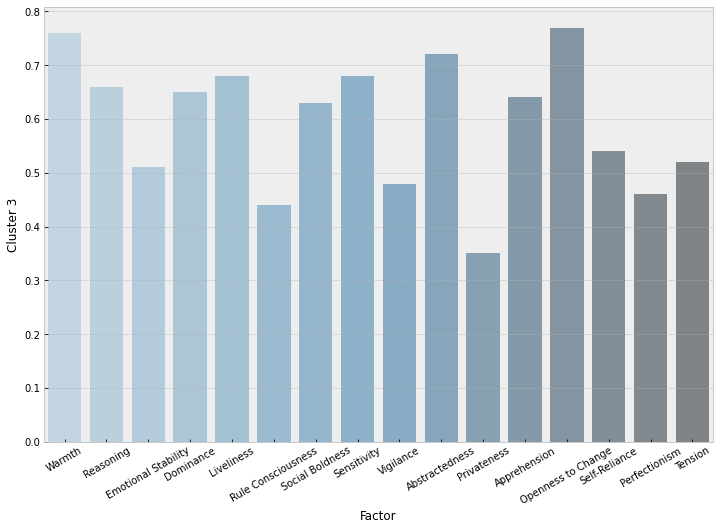

In [145]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=30)
sns.barplot(data=cluster_means, x = 'Factor', y = 'Cluster 3',palette='Blues_d', alpha=0.6)
plt.show()

In [89]:
sort = my_test.copy()
sort.sort_values("My Test", ascending=False, inplace = True)

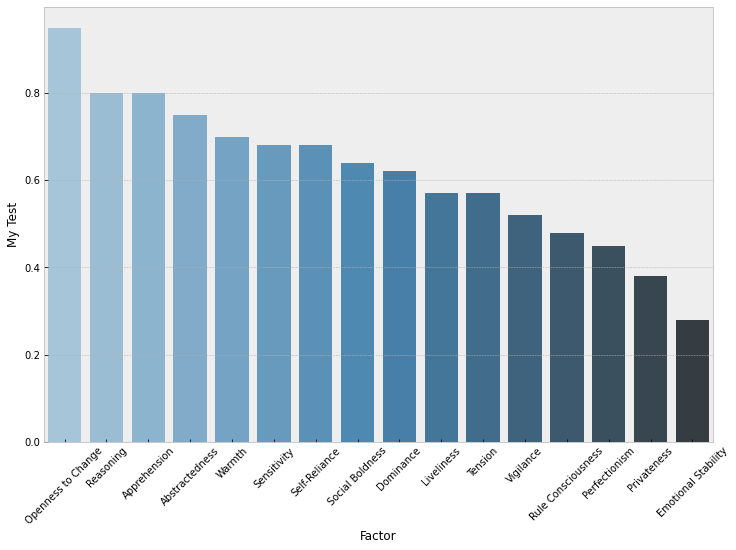

In [90]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
sns.barplot(data=sort, x = 'Factor', y = 'My Test',palette='Blues_d')
plt.show()


In [74]:
my_test.head()

Factor  My Test
0               Warmth     0.70
1            Reasoning     0.80
2  Emotional Stability     0.28
3            Dominance     0.62
4           Liveliness     0.57

# Exploring my Top and Bottom 3 Factors

1. Openness to Change
2. Reasoning
3. Apprehension

1. Emotional Stability
2. Privateness
3. Perfectionism

My Cluster = 3


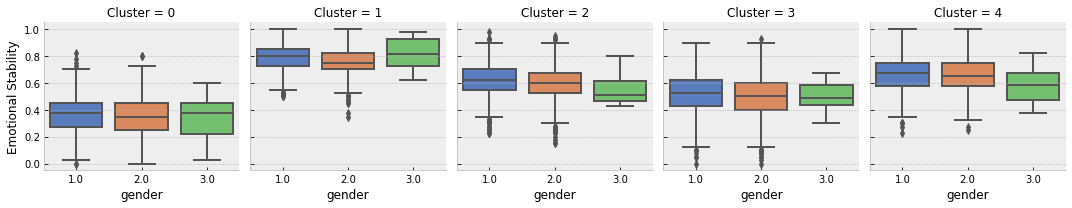

In [13]:
ordered_clusters = sorted(df['Cluster'].unique())
g = sns.FacetGrid(df,col='Cluster',col_order=ordered_clusters,col_wrap=5)

#                                               change this to 4 ^
g.map(sns.boxplot,'gender','Emotional Stability',palette='muted')
for ax in g.axes.flatten(): 
    ax.tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

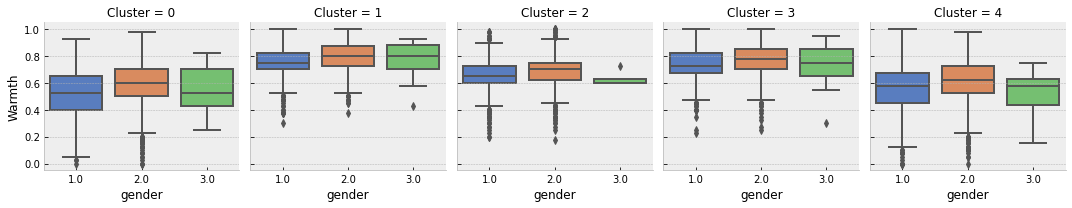

In [14]:
g = sns.FacetGrid(df,col='Cluster',col_order=ordered_clusters,col_wrap=5)
g.map(sns.boxplot,'gender','Warmth',palette='muted')
for ax in g.axes.flatten(): 
    ax.tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

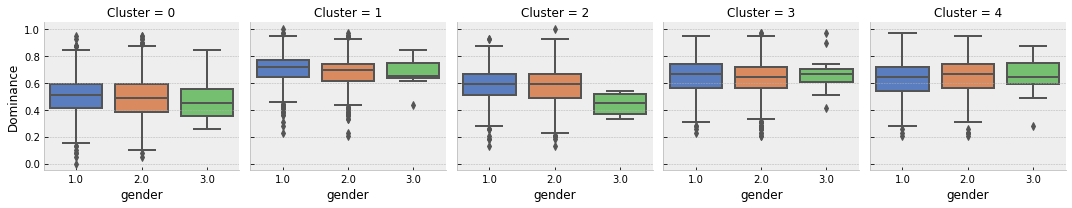

In [16]:
g = sns.FacetGrid(df,col='Cluster',col_order=ordered_clusters,col_wrap=5)
g.map(sns.boxplot,'gender','Dominance',palette='muted')
for ax in g.axes.flatten(): 
    ax.tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

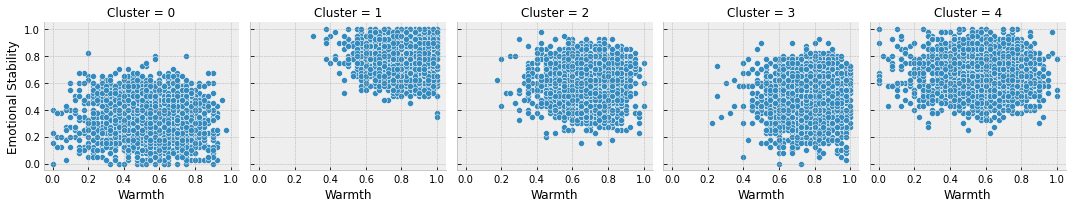

In [22]:
ordered_clusters = sorted(df['Cluster'].unique())
g = sns.FacetGrid(df,col='Cluster',col_order=ordered_clusters,col_wrap=5)

#                                               change this to 4 ^
g.map(sns.scatterplot,'Warmth','Emotional Stability',palette='muted')
for ax in g.axes.flatten(): 
    ax.tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

# Correlations Matrix - Entire Sample

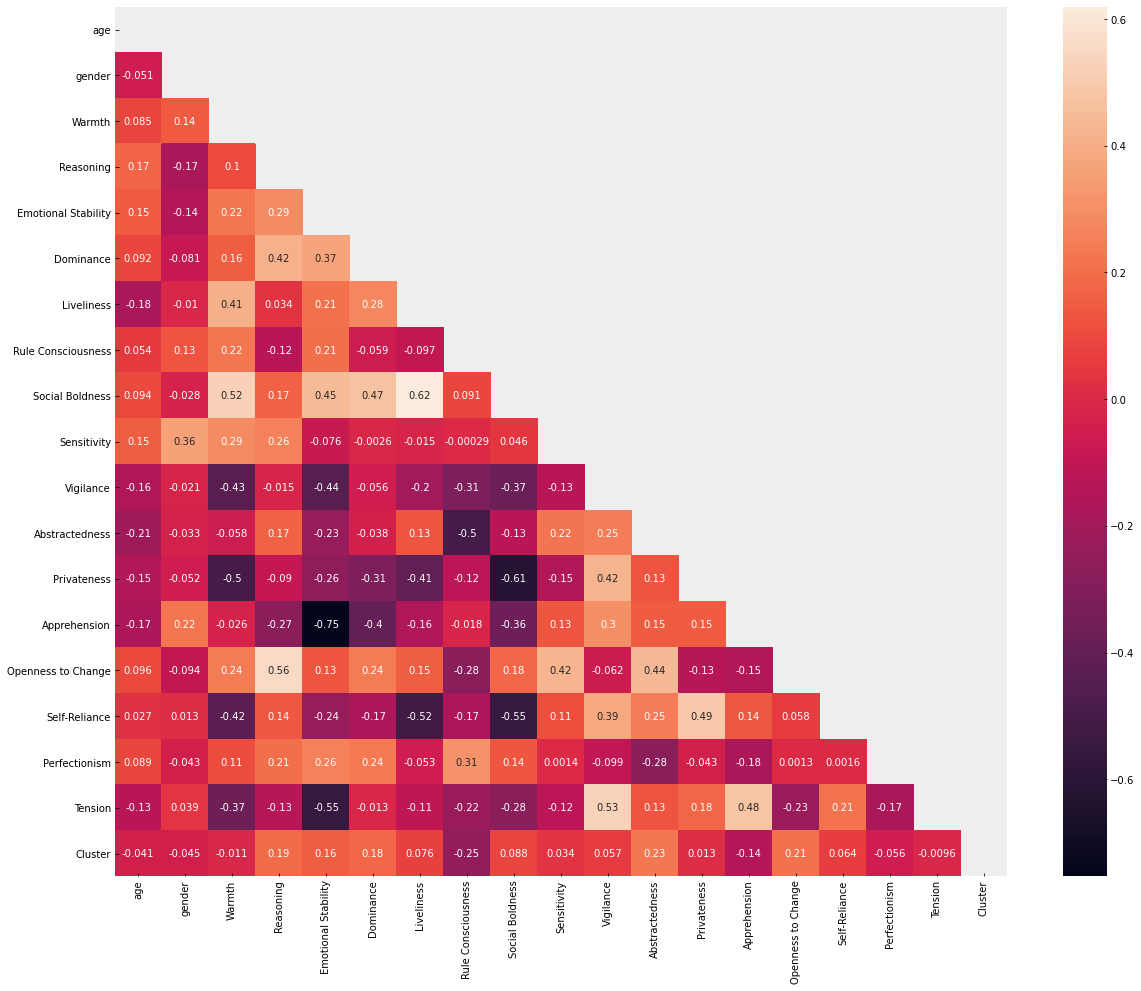

In [34]:

correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


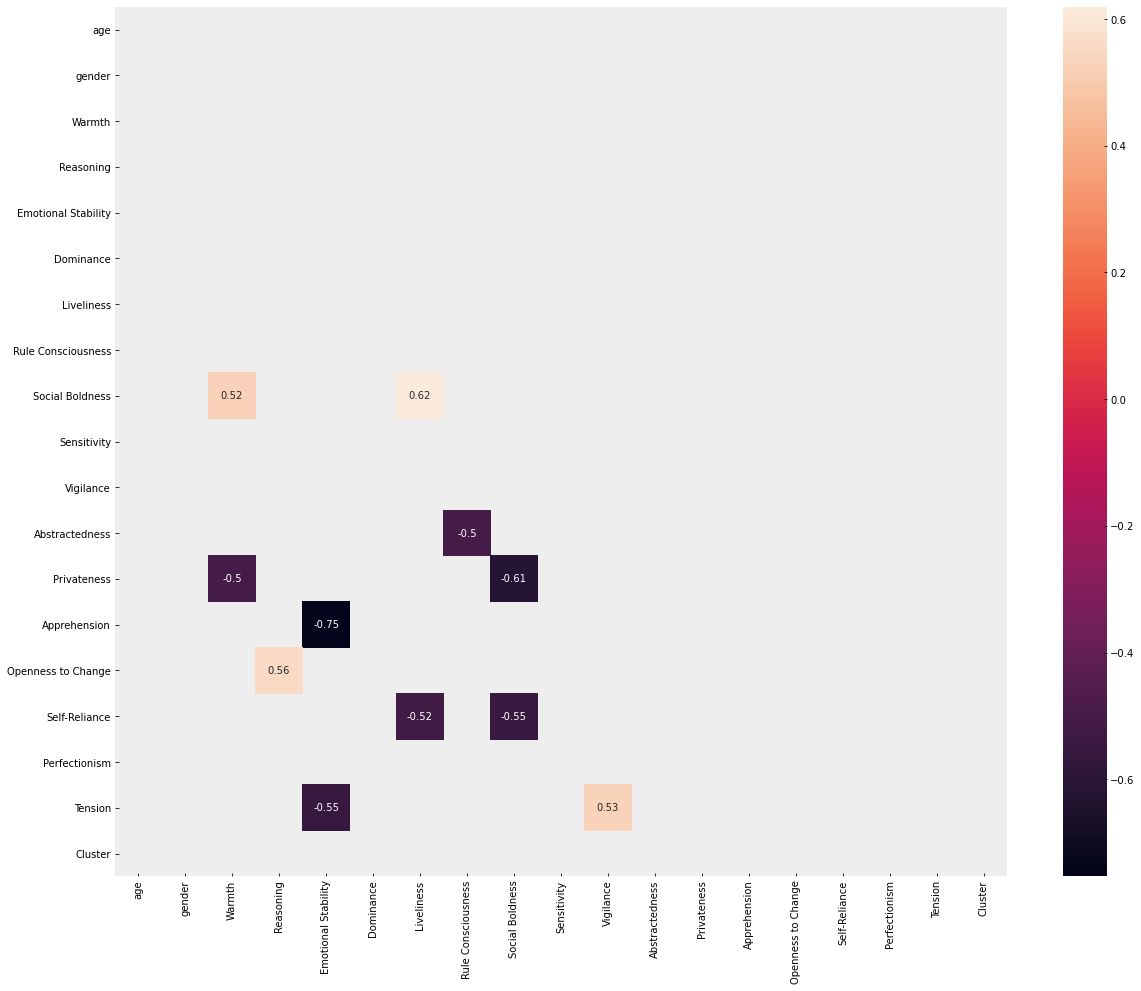

In [68]:
corr = df.corr()
filtered = corr[((corr >= .5) | (corr <= -.5)) & (corr !=1.000)]
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(filtered, mask=mask, annot=True)
plt.show()

# Analysis of Cluster

In [67]:
# Need to call my_cluster from elsewhere
cluster = df[df['Cluster'] == my_cluster]


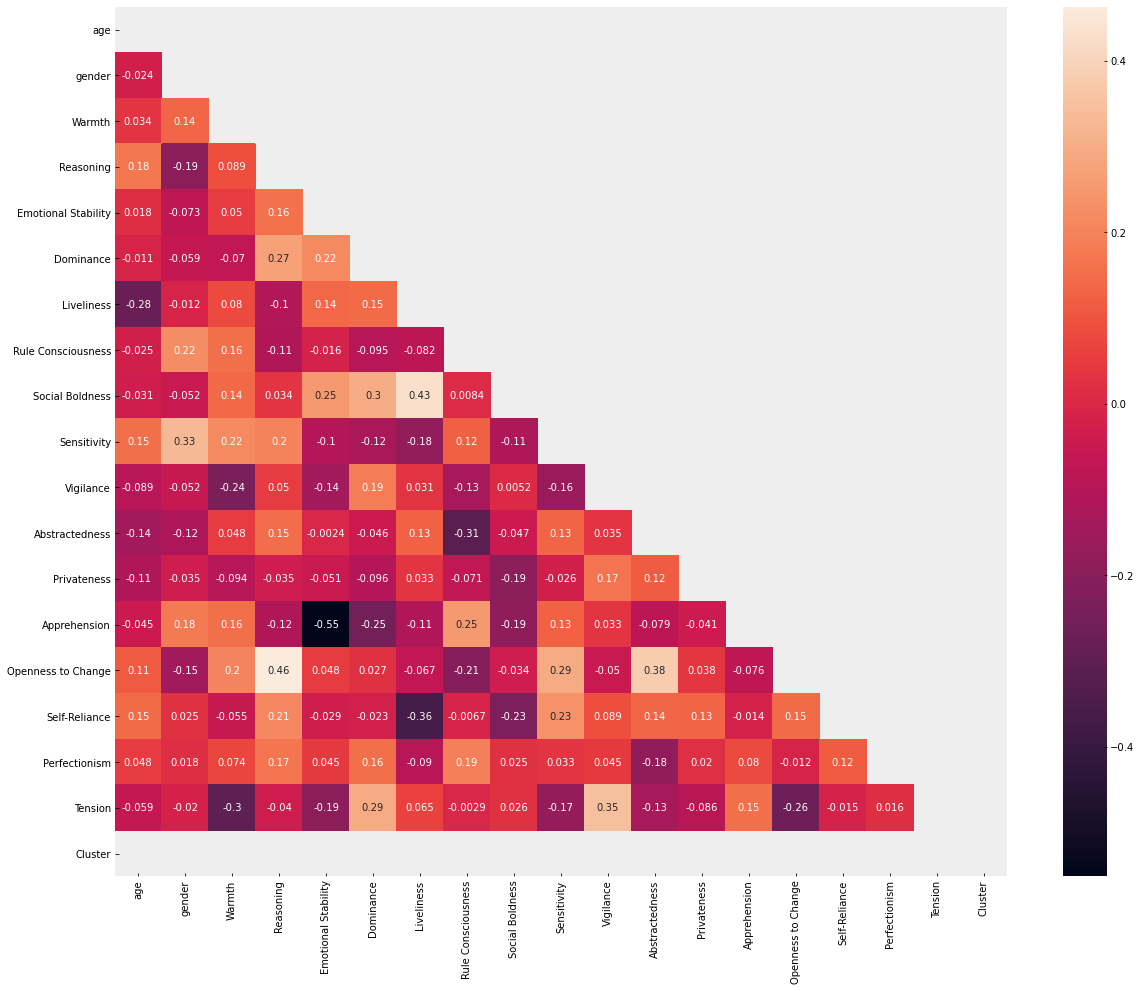

In [69]:
correlations_matrix = cluster.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

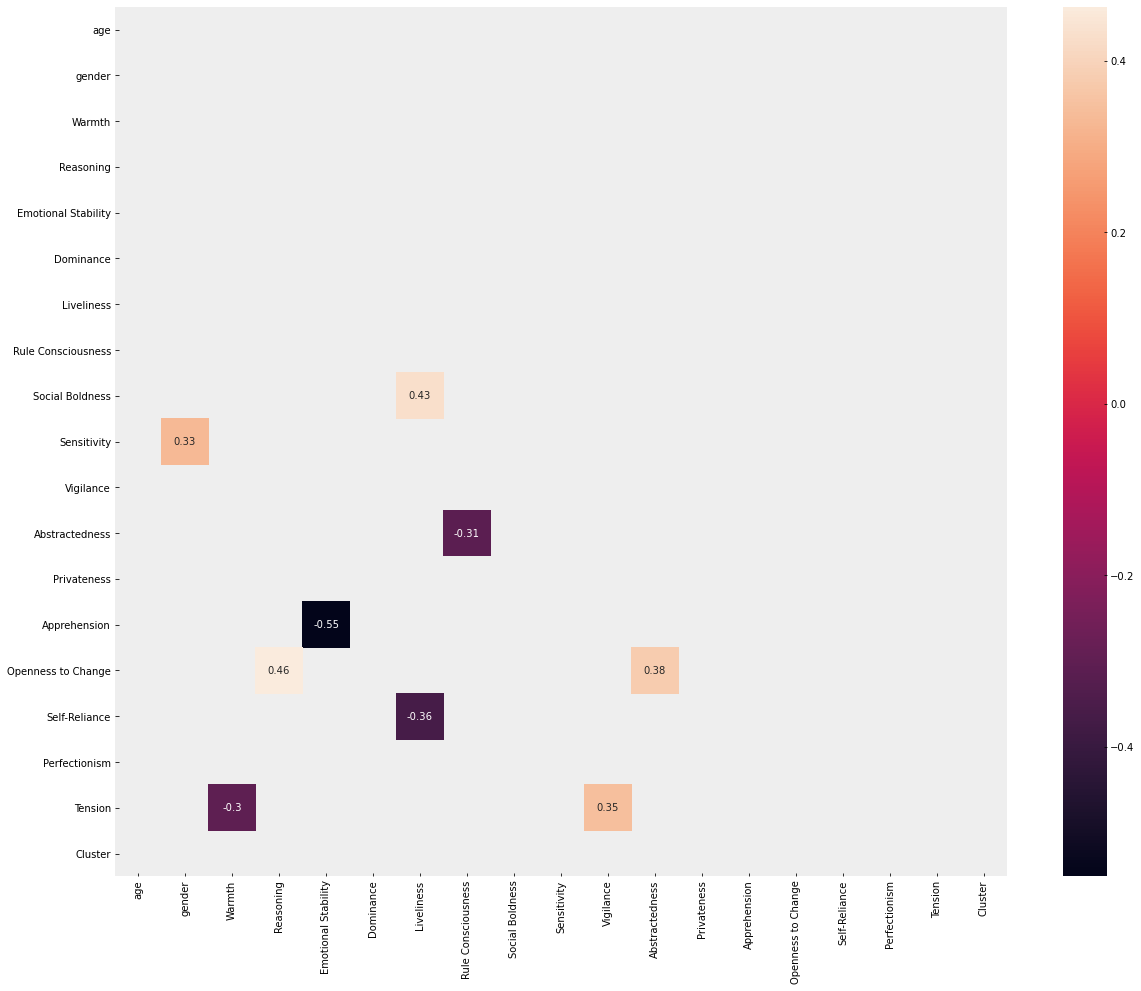

In [70]:
corr = cluster.corr()
filtered = corr[((corr >= .3) | (corr <= -.3)) & (corr !=1.000)]
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(filtered, mask=mask, annot=True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

<AxesSubplot:xlabel='Warmth', ylabel='Emotional Stability'>

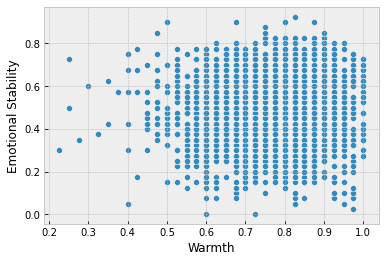

In [27]:
sns.scatterplot(data = cluster, x = 'Warmth',y = 'Emotional Stability',palette='muted')

<AxesSubplot:xlabel='Openness to Change', ylabel='Emotional Stability'>

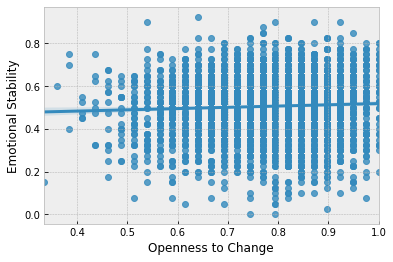

In [39]:
sns.regplot(data = cluster, x = 'Openness to Change',y = 'Emotional Stability')

<AxesSubplot:xlabel='Warmth', ylabel='Privateness'>

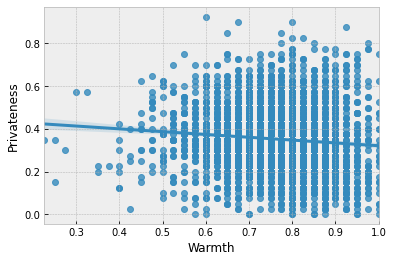

In [38]:
sns.regplot(data = cluster, x = 'Warmth',y = 'Privateness')

<AxesSubplot:xlabel='Social Boldness', ylabel='Liveliness'>

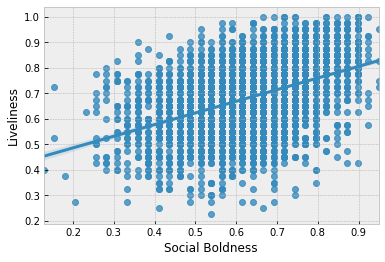

In [37]:
sns.regplot(data = cluster x = 'Social Boldness',y = 'Liveliness')

<AxesSubplot:xlabel='Apprehension', ylabel='Emotional Stability'>

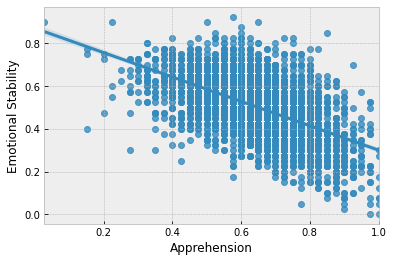

In [72]:
sns.regplot(data = cluster, x = 'Apprehension',y = 'Emotional Stability')

<AxesSubplot:xlabel='Tension', ylabel='Warmth'>

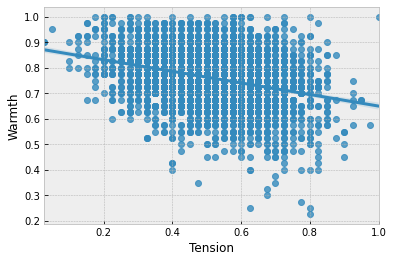

In [73]:
sns.regplot(data = cluster, x = 'Tension',y = 'Warmth')

<AxesSubplot:xlabel='Tension', ylabel='Warmth'>

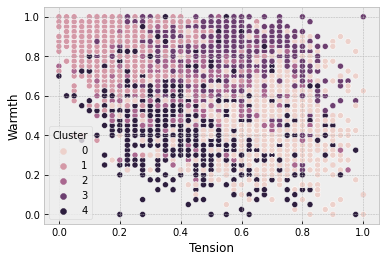

In [106]:
sns.scatterplot(data = df, x = 'Tension',y = 'Warmth', hue = 'Cluster')

# Plotting Clusters

In [ ]:
#Unnecessary but just commenting out
#fig, ax = plt.subplots()
#for i in range(0,len(df['Cluster'].unique())):
    #sns.scatterplot(data = df[df['Cluster'] == i],legend="brief", x = 'Tension',y = 'Warmth', ax=ax)








 


In [164]:
df2 = df.iloc[:,3:21]
df2.head()

2    4646
1    4586
3    3553
0    3048
4    2887
Name: Cluster, dtype: int64

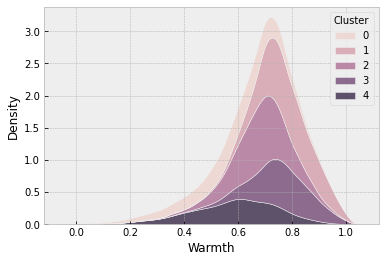

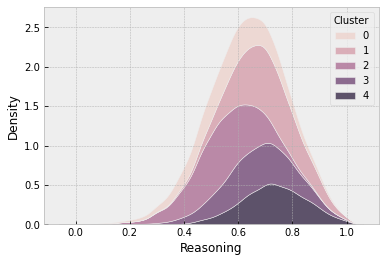

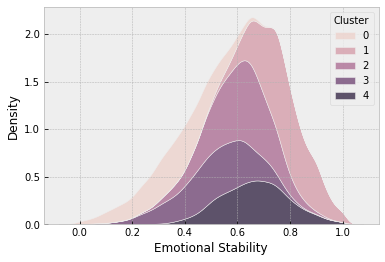

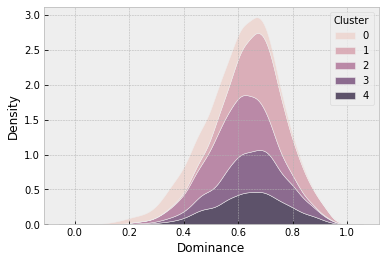

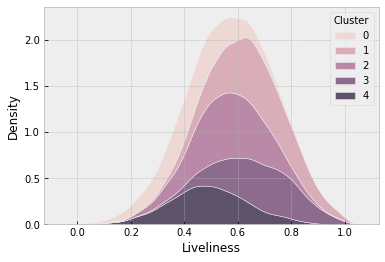

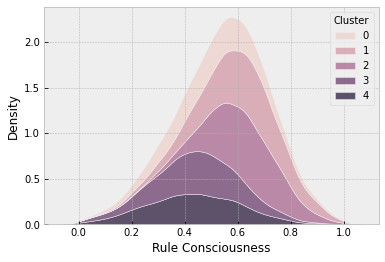

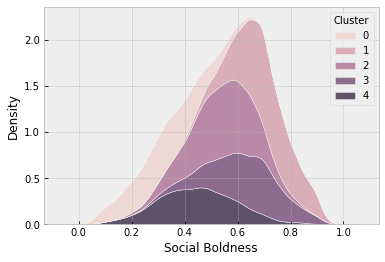

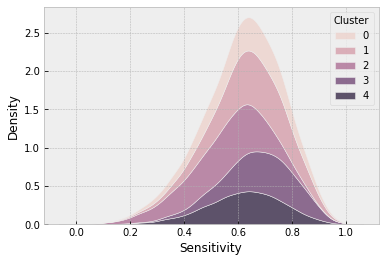

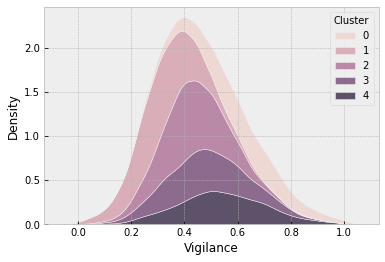

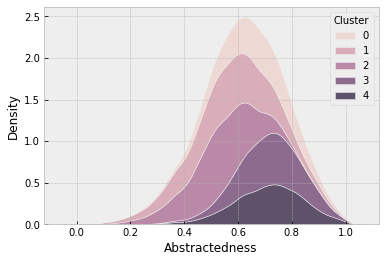

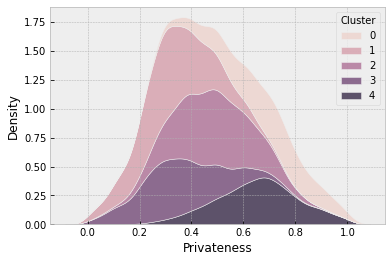

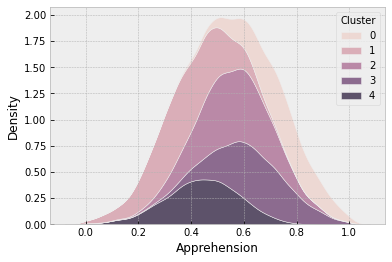

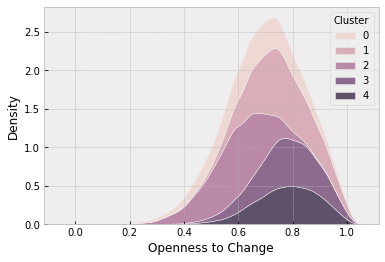

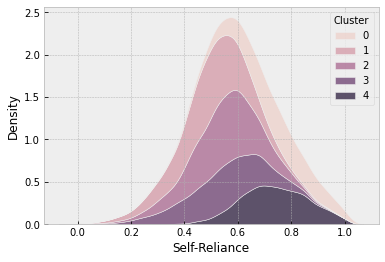

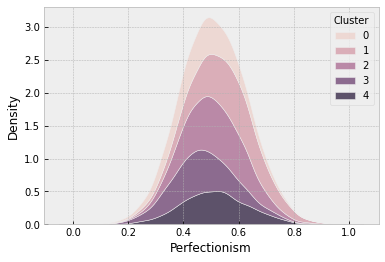

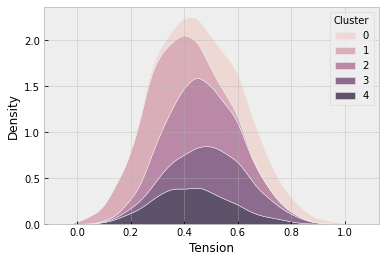

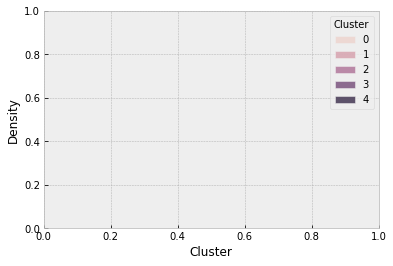

In [161]:
for column in df2.columns:
        sns.kdeplot(data=df2,x = column, hue='Cluster', multiple='stack')
        plt.show()

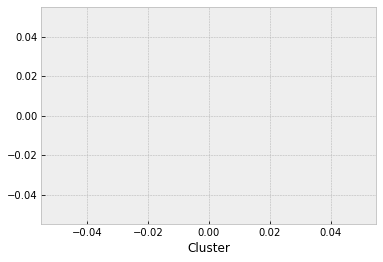

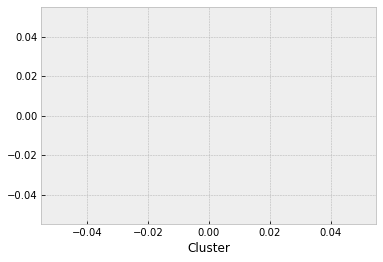

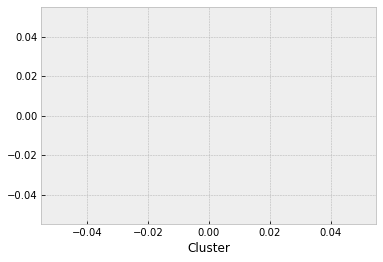

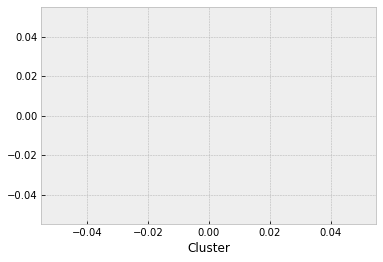

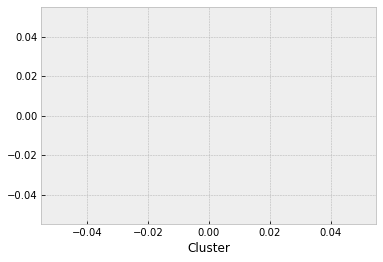

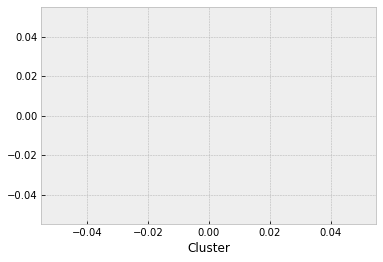

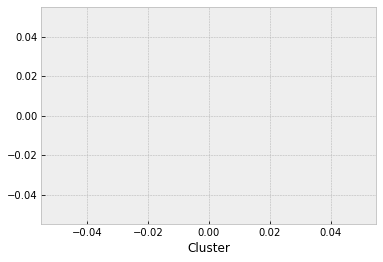

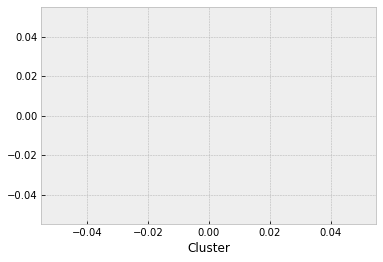

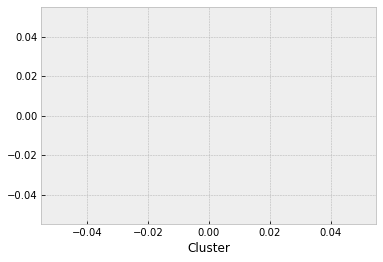

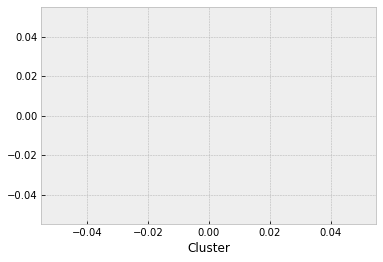

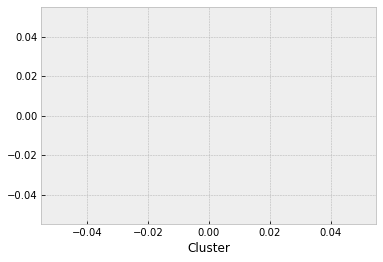

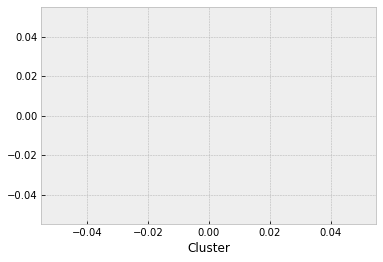

KeyboardInterrupt: 

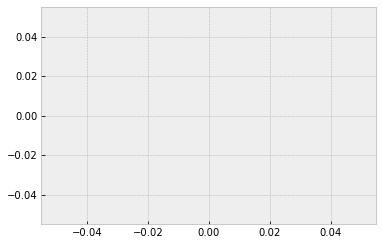

In [165]:
for column in df2.columns:
        sns.lineplot(data=df2,x = 'Cluster', hue=column, legend=False)
        plt.show()

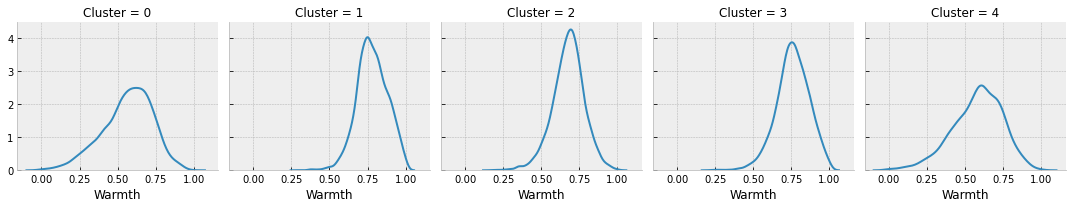

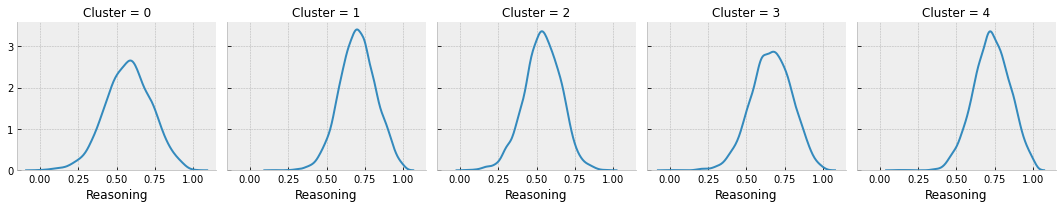

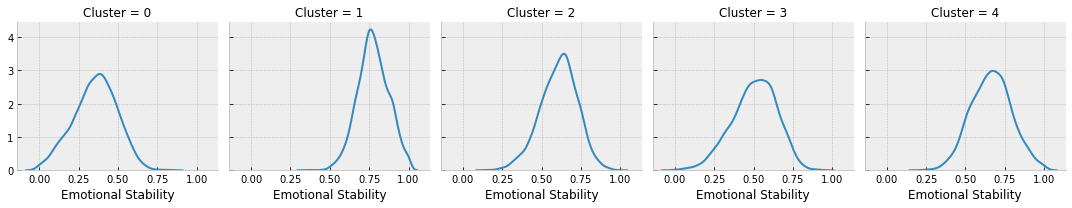

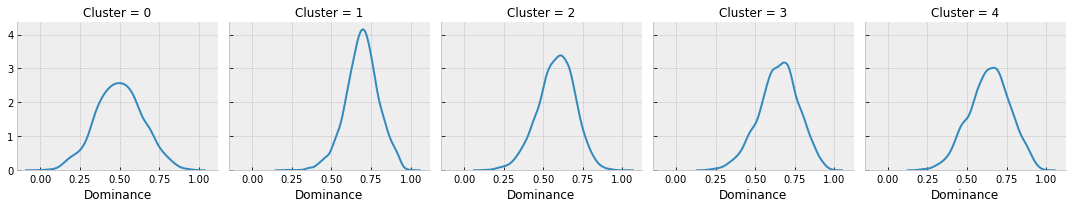

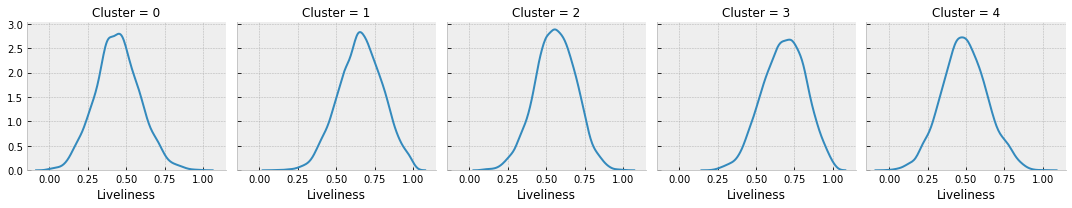

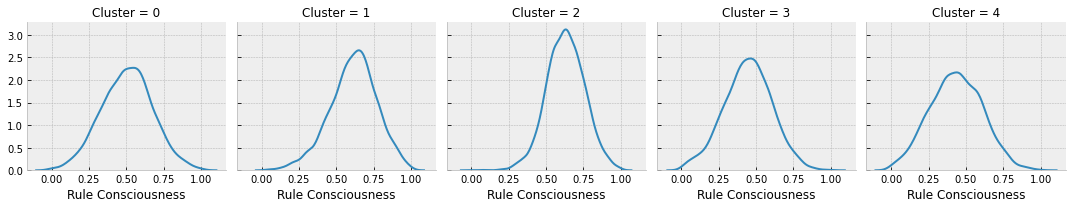

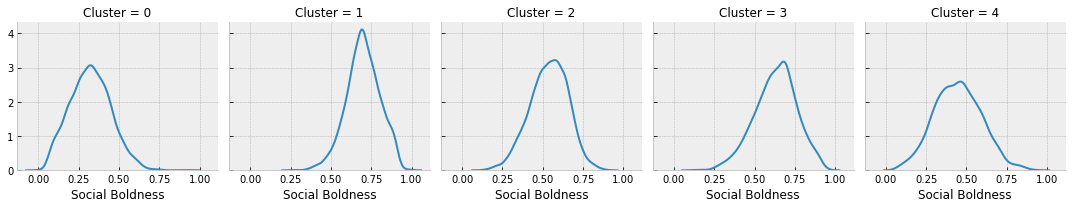

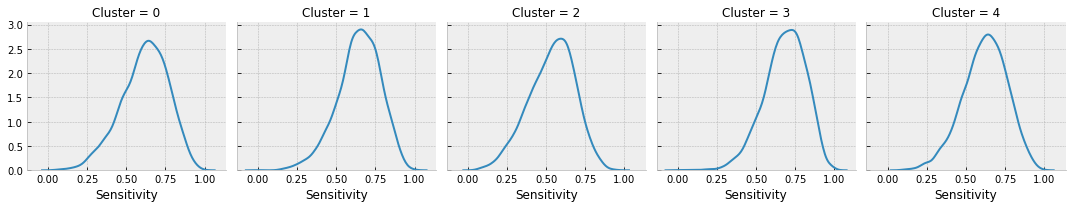

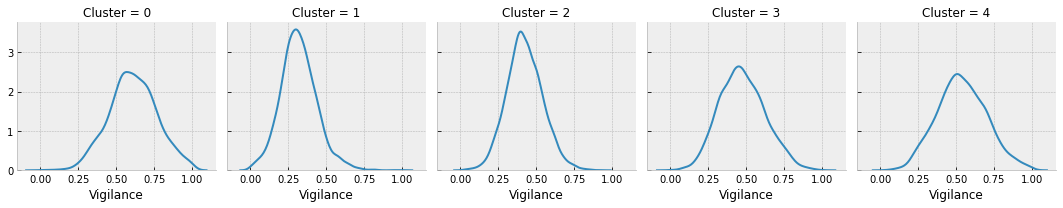

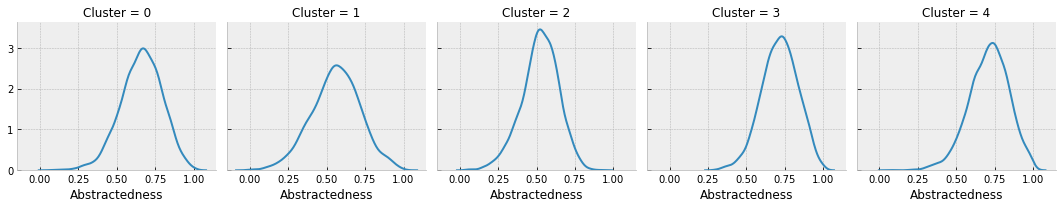

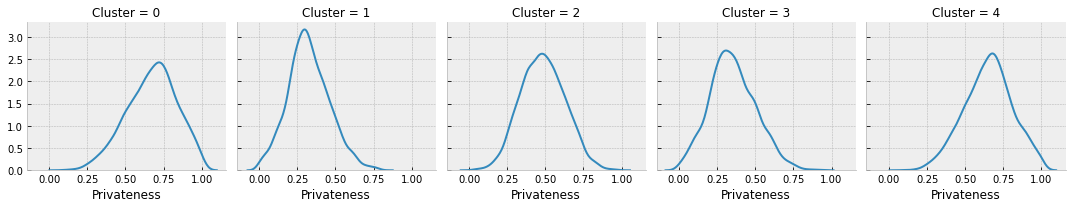

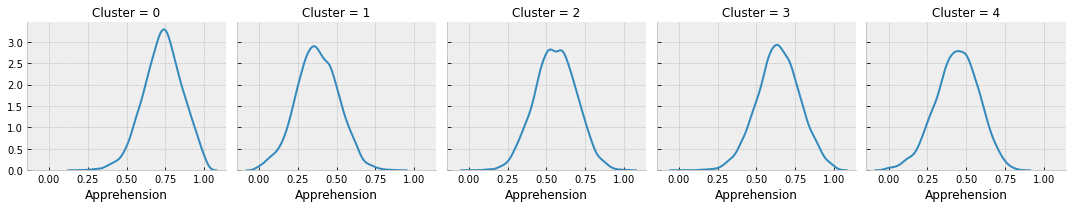

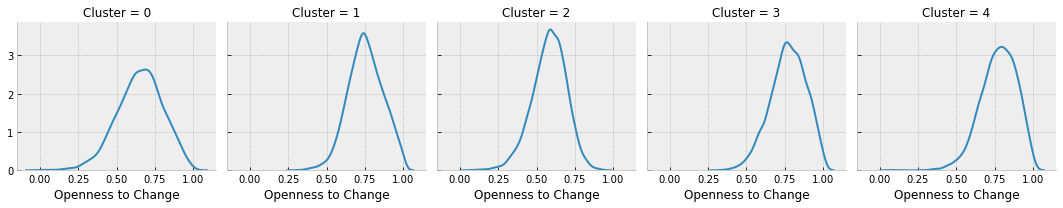

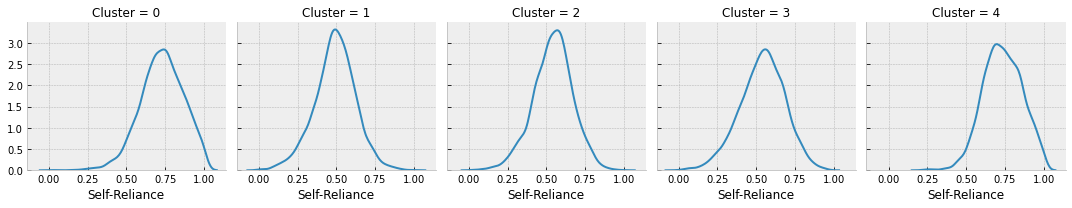

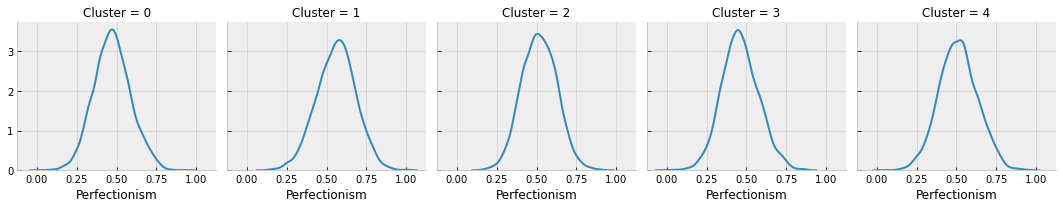

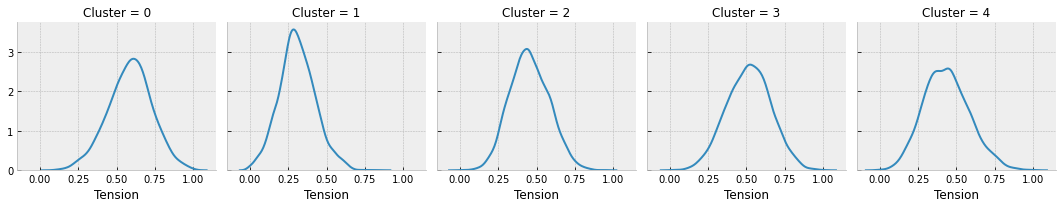

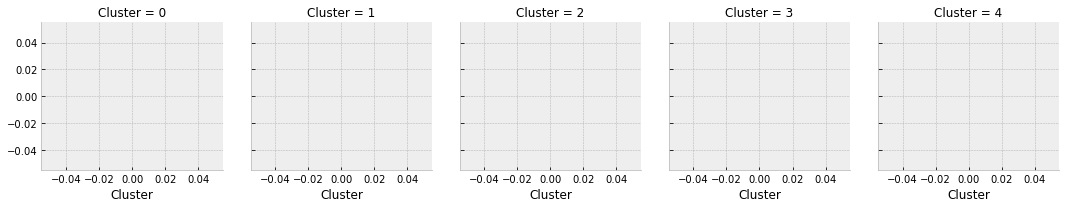

In [149]:
for column in df2.columns:
    g = sns.FacetGrid(df2, col="Cluster")
    g.map(sns.kdeplot, column,)

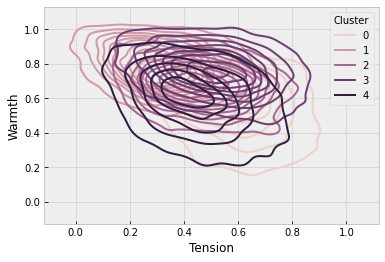

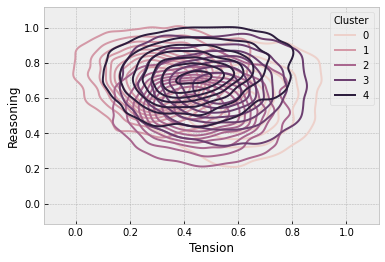

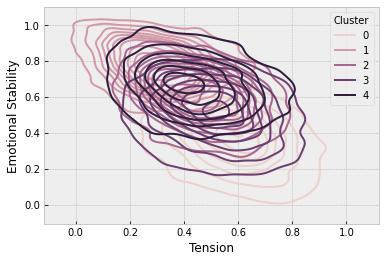

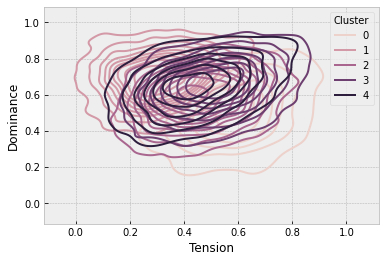

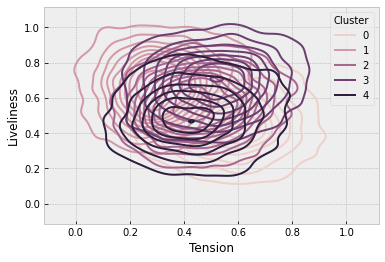

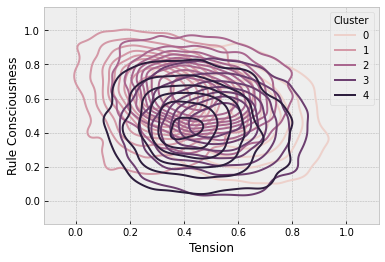

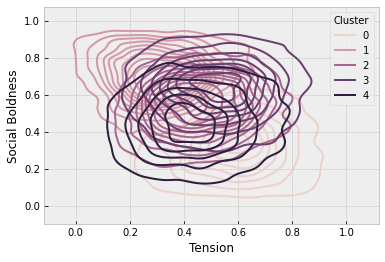

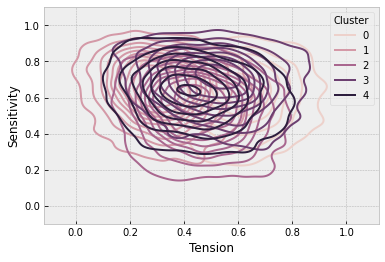

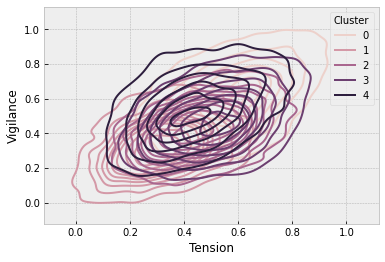

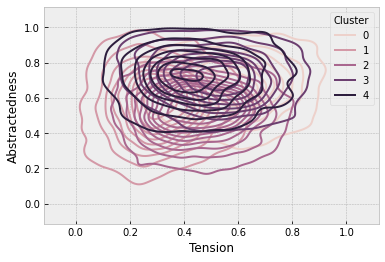

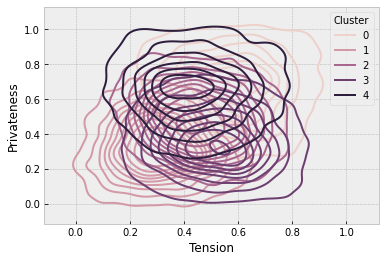

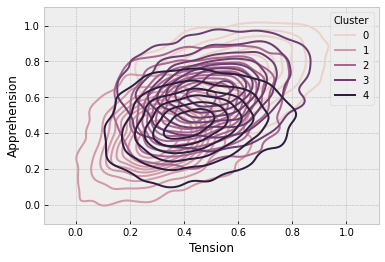

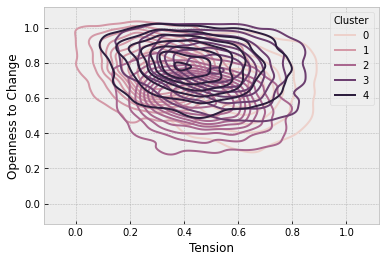

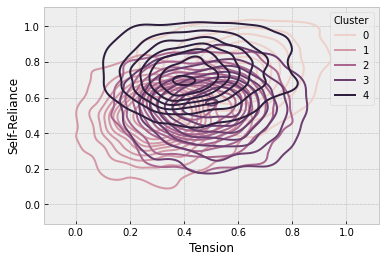

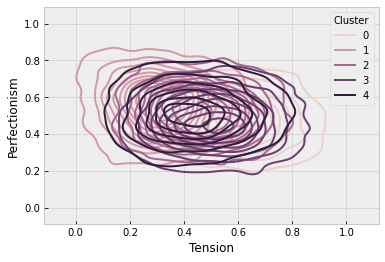

LinAlgError: singular matrix

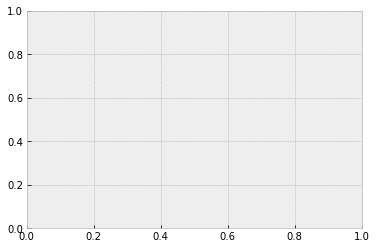

In [150]:
for column in df2.columns:
    sns.kdeplot(data =df2, x = 'Tension', y = column, hue = 'Cluster')
    plt.show()

Warmth  Reasoning  Emotional Stability  Dominance  Liveliness  \
0   0.375   0.863636                0.575   0.641026       0.525   
1   0.725   0.590909                0.525   0.461538       0.600   
2   0.750   0.818182                0.800   0.589744       0.725   
3   0.775   0.636364                0.775   0.512821       0.675   
4   0.700   0.681818                0.625   0.871795       0.500   

   Rule Consciousness  Social Boldness  Sensitivity  Vigilance  \
0               0.275         0.358974     0.684211      0.600   
1               0.400         0.564103     0.552632      0.500   
2               0.800         0.743590     0.473684      0.375   
3               0.750         0.564103     0.421053      0.450   
4               0.450         0.692308     0.789474      0.575   

   Abstractedness  Privateness  Apprehension  Openness to Change  \
0           0.975        0.400         0.575            0.794872   
1           0.950        0.550         0.575            0.666667   
2           0.550        0.500         0.350            0.666667   
3           0.500        0.575         0.650            0.538462   
4           0.725        0.100         0.525            0.564103   

   Self-Reliance  Perfectionism  Tension  Cluster  
0          0.675       0.368421    0.700        4  
1          0.875       0.342105    0.400        4  
2          0.550       0.605263    0.275        1  
3          0.675       0.736842    0.525        2  
4          0.450       0.526316    0.675        3

KeyError: "None of [Index([(0, 'age')], dtype='object')] are in the [columns]"

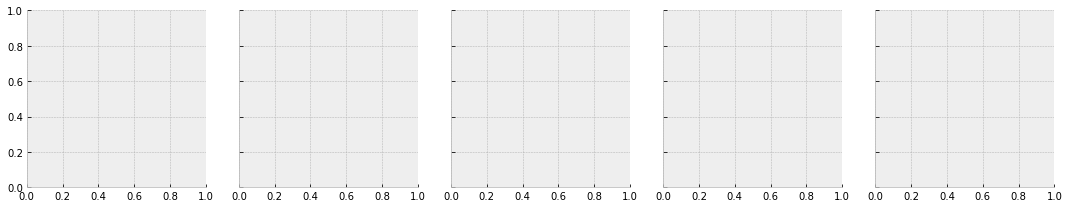

In [132]:
g = sns.FacetGrid(df, col="Cluster")
g.map(sns.kdeplot, column)















<AxesSubplot:xlabel='Tension', ylabel='Warmth'>

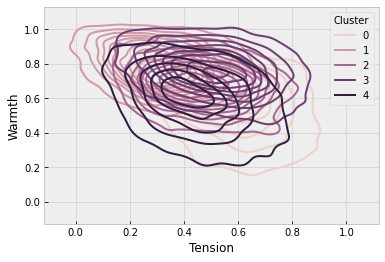

In [119]:
sns.kdeplot(data = df, x = 'Tension',y = 'Warmth', hue = 'Cluster')